In [ ]:
import pandas as pd #pandas to create small dataframes 
import numpy as np #Do aritmetic operations on arrays
import matplotlib # matplotlib: used to plot graphs
#matplotlib.use('nbagg') : matplotlib uses this protocall which makes plots more user intractive like zoom in and zoom out
matplotlib.use('nbagg')
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots 
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import lightgbm as lgb

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading pre-processed data from ftr files
X_train_f= pd.read_feather('/content/drive/MyDrive/PGDUOH/Project/ProcessedData/X_train_F.ftr')
X_cv_f= pd.read_feather('/content/drive/MyDrive/PGDUOH/Project/ProcessedData/X_cv_F.ftr')
Y_train_f= np.load('/content/drive/MyDrive/PGDUOH/Project/ProcessedData/Y_train.npy')
Y_cv_f= np.load('/content/drive/MyDrive/PGDUOH/Project/ProcessedData/Y_cv.npy')

In [ ]:
# Y_cv_f
X_train_f.drop(['index'], axis=1, inplace=True)
X_cv_f.drop(['index'], axis=1, inplace=True)
X_train_f.head()

,meter,site_id,primary_use,square_feet,year_built,floor_count,cloud_coverage,dew_temperature,precip_depth_1_hr,wind_direction,wind_speed,month,weekday,hour,is_holiday,season,IsDay,relative_humidity
0,0,0,11,9.110078,2016.0,0.693359,6.0,20.000000,0.0,0.0,0.000000,1,4,0,0,3,0,73.8125
1,0,13,6,12.427046,1965.0,0.693359,8.0,-12.203125,0.0,250.0,4.101562,1,4,0,0,3,0,73.3750
2,2,13,8,11.337619,1965.0,0.693359,8.0,-12.203125,0.0,250.0,4.101562,1,4,0,0,3,0,73.3750
3,1,13,8,11.337619,1965.0,0.693359,8.0,-12.203125,0.0,250.0,4.101562,1,4,0,0,3,0,73.3750
4,0,13,8,11.337619,1965.0,0.693359,8.0,-12.203125,0.0,250.0,4.101562,1,4,0,0,3,0,73.3750


In [ ]:
!pip install catboost

In [ ]:
# estimators: 100
cv_rmsle=[]
feature_name =  ['meter','site_id','primary_use','square_feet','year_built','floor_count','cloud_coverage','dew_temperature','precip_depth_1_hr','wind_direction','wind_speed','month','weekday','hour','is_holiday','season','IsDay','relative_humidity']  
categorical_feature = ['meter','site_id','primary_use','year_built','month','weekday','hour','is_holiday','season','IsDay']
categorical_features_indices= [ 0,  1,  2, 11, 12, 13, 14, 15, 16]
import catboost as cb
cgbdt_f=cb.CatBoostRegressor(n_estimators=100)
cgbdt_f.fit(X_train_f,Y_train_f,cat_features=categorical_features_indices)
cgbdt_cv_f=cgbdt_f.predict(X_cv_f)
from sklearn.preprocessing import minmax_scale
Y_cv_f = minmax_scale(Y_cv_f, feature_range=(0, 1))  # 0-1 scaling
cgbdt_cv_f = minmax_scale(cgbdt_cv_f, feature_range=(0, 1))  # 0-1 scaling
cv_rmsle.append(np.sqrt(mean_squared_log_error(Y_cv_f, cgbdt_cv_f)))
print("rmsle for estimators:", 100,'is',np.sqrt(mean_squared_log_error(Y_cv_f, cgbdt_cv_f)))

Learning rate set to 0.5
0:	learn: 1.4807754	total: 8.89s	remaining: 14m 40s
1:	learn: 1.3337376	total: 17.5s	remaining: 14m 15s
2:	learn: 1.2339701	total: 24.7s	remaining: 13m 18s
3:	learn: 1.1956145	total: 31.2s	remaining: 12m 28s
4:	learn: 1.1756696	total: 39s	remaining: 12m 21s
5:	learn: 1.1522988	total: 46.9s	remaining: 12m 14s
6:	learn: 1.1334216	total: 53.3s	remaining: 11m 48s
7:	learn: 1.1112622	total: 1m 2s	remaining: 11m 57s
8:	learn: 1.0906767	total: 1m 10s	remaining: 11m 48s
9:	learn: 1.0817174	total: 1m 16s	remaining: 11m 30s
10:	learn: 1.0729587	total: 1m 23s	remaining: 11m 15s
11:	learn: 1.0664876	total: 1m 30s	remaining: 11m 1s
12:	learn: 1.0536537	total: 1m 37s	remaining: 10m 51s
13:	learn: 1.0408839	total: 1m 44s	remaining: 10m 40s
14:	learn: 1.0340772	total: 1m 51s	remaining: 10m 32s
15:	learn: 1.0298823	total: 1m 58s	remaining: 10m 19s
16:	learn: 1.0204717	total: 2m 4s	remaining: 10m 9s
17:	learn: 1.0092309	total: 2m 11s	remaining: 9m 58s
18:	learn: 1.0038132	total:

In [ ]:
import joblib
filename_reg='/content/drive/MyDrive/PGDUOH/Project/cgbdt_f_100.sav'
joblib.dump(cgbdt_f,filename_reg)

['/content/drive/MyDrive/PGDUOH/Project/cgbdt_f_100.sav']

In [ ]:
X_train_f.dtypes

meter                   int8
site_id                 int8
primary_use            int64
square_feet          float64
year_built           float16
floor_count          float16
cloud_coverage       float16
dew_temperature      float16
precip_depth_1_hr    float16
wind_direction       float16
wind_speed           float16
month                  int64
weekday                int64
hour                   int64
is_holiday             int64
season                 int64
IsDay                  int64
relative_humidity    float16
dtype: object

In [ ]:
# categorical_features_indices = np.where(X_train_f.dtypes != np.float16)[0]
# categorical_features_indices

array([ 0,  1,  2,  3, 11, 12, 13, 14, 15, 16])

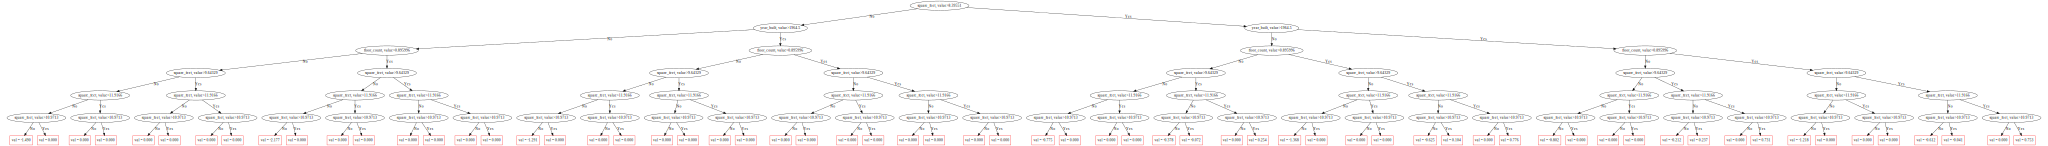

In [ ]:
from catboost import Pool
categorical_features_indices= [ 0,  1,  2, 11, 12, 13, 14, 15, 16]
pool = Pool(X_train_f,Y_train_f,cat_features=categorical_features_indices, feature_names=list(X_train_f.columns))
cgbdt_f.plot_tree(
    tree_idx=0,
    pool=pool
)

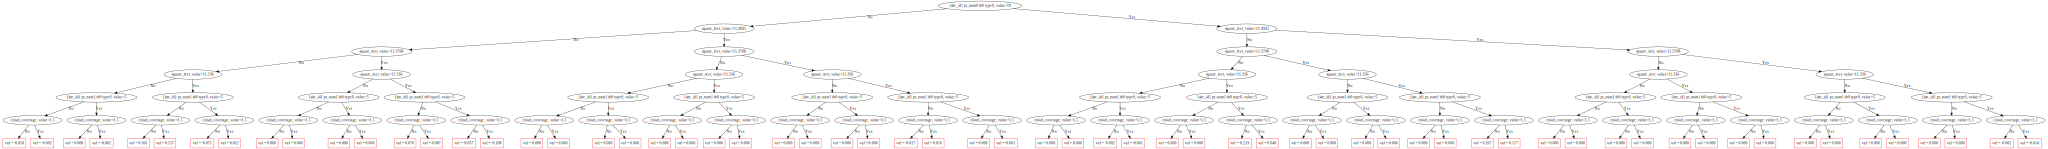

In [ ]:
cgbdt_f.plot_tree(
    tree_idx=98,
    pool=pool
)

In [ ]:
!pip install shap

     |████████████████████████████████| 564 kB 5.2 MB/s 


In [ ]:
import joblib
cgbdt_f= joblib.load('/content/drive/MyDrive/PGDUOH/Project/cgbdt_f_100.sav')

In [ ]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
import shap
from catboost import Pool
categorical_features_indices= [ 0,  1,  2, 11, 12, 13, 14, 15, 16]
explainer = shap.TreeExplainer(cgbdt_f)
shap_values = explainer.shap_values(Pool(X_cv_f,Y_cv_f,cat_features=categorical_features_indices))

# visualize the first prediction's explanation
# shap.plots.waterfall(shap_values[0])

AttributeError: ignored

In [ ]:
shap_values[0]

array([-0.25288442, -0.11672186, -0.11630222, -1.50242517,  0.36928851,
       -0.01443917, -0.01519167, -0.17432754,  0.        ,  0.001681  ,
        0.        , -0.00743491,  0.        ,  0.01008697,  0.        ,
        0.01567698,  0.03845875,  0.06820655])

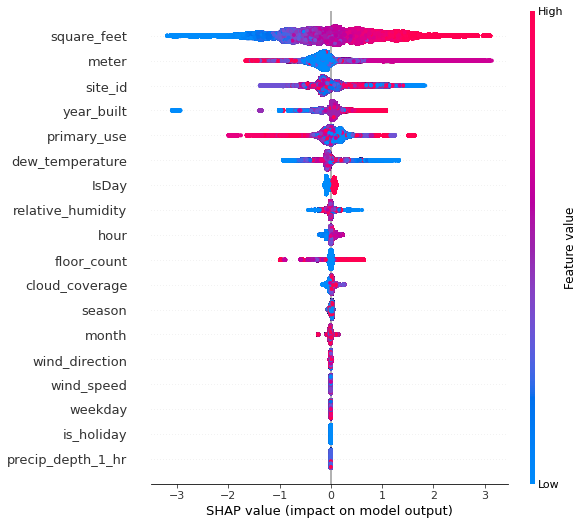

In [ ]:
shap.summary_plot(shap_values,X_cv_f)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
lgb_reg=lgb.LGBMRegressor(boosting_type='gbdt', n_estimators=2000, objective='rmse',n_jobs=-1)
lgb_reg.fit(X_train_f,Y_train_f)
pred_reg_lgb_cv=lgb_reg.predict(X_cv_f)
pred_reg_lgb_tr=lgb_reg.predict(X_train_f)
print("Train rmse for estimators:", 2000,'is',math.sqrt(mean_squared_error(Y_train_f, pred_reg_lgb_tr)))
print("CV rmse for estimators:", 2000,'is',math.sqrt(mean_squared_error(Y_cv_f, pred_reg_lgb_cv)))

Train rmse for estimators: 2000 is 0.4916599992713424


ValueError: ignored

In [ ]:
print("CV rmse for estimators:", 2000,'is',math.sqrt(mean_squared_error(Y_cv_f, pred_reg_lgb_cv)))

CV rmse for estimators: 2000 is 0.6790496337384981


In [ ]:
import joblib
filename_reg='/content/drive/MyDrive/PGDUOH/Project/LGBwoCat.sav'
joblib.dump(lgb_reg,filename_reg)

['/content/drive/MyDrive/PGDUOH/Project/LGBwoCat.sav']

In [ ]:
import joblib
lgb_reg= joblib.load('/content/drive/MyDrive/PGDUOH/Project/LGBwoCat.sav')

In [ ]:
# Reding pre-processed test data
test_merged_F= pd.read_feather('/content/drive/MyDrive/PGDUOH/Project/ProcessedData/test_merged_F.ftr')

In [ ]:
predictions_lgb=pd.DataFrame()
predictions_lgb['row_id']=test_merged_F['row_id']

In [ ]:
test_merged_F.drop(['row_id'], axis=1, inplace=True)
test_merged_F.drop(['index'], axis=1, inplace=True)

In [ ]:
predictions_lgb['meter_reading_log']= lgb_reg.predict(test_merged_F)

In [ ]:
# The prediction are in log form so converting them to exp(x)-1
predictions_lgb['meter_reading']= np.expm1(predictions_lgb['meter_reading_log'])

In [ ]:
predictions_lgb.drop(['meter_reading_log'], axis=1,inplace=True)

In [ ]:
predictions_lgb.shape

(41697600, 2)

In [ ]:
predictions_lgb.to_csv('/content/drive/MyDrive/PGDUOH/Project/ProcessedData/LGBwoCat.csv', index=False)